<p>
    
<center>
     <img src="tv kills u.gif" alt="Simply Easy Learning">
</center>

Do tv channels increase the volume at advertisement. To test that we collected the volume in decibels of 10 tv channels during regular programs such as tv series, news and documentaries, and during advertisement. Let see the data:

In [3]:
program<-c(68.8,60.9,63.5,59.6,59.3,61.1,65.7,60.6,66.4,63.8)
ads<-c(71.2,71.9,70.3,74.1,70.5,69.1,75.3,73.6,70.1,67.1)
tv<-c("Rtve","Antena3","laSexta","ETB","Disney","Tele5","Cuatro","BeMad","Energy","Neox")
#long format data
data.db<-data.frame(tv,program,ads)
data.db

tv,program,ads
<chr>,<dbl>,<dbl>
Rtve,68.8,71.2
Antena3,60.9,71.9
laSexta,63.5,70.3
ETB,59.6,74.1
Disney,59.3,70.5
Tele5,61.1,69.1
Cuatro,65.7,75.3
BeMad,60.6,73.6
Energy,66.4,70.1


Thi is the data in the so called wide format, with the columns program and ads indicating the volume in decibels. It is also convenient to have the data in wide format, where the group advertisiment or program is indicating in a different column:

In [4]:
#long format
tv<-c(tv,tv)
type<-c(rep("program",10),rep("ads",10))
db<-c(program,ads)
data.db.2<-data.frame(tv=tv,type=type,volume=db)
data.db.2

tv,type,volume
<chr>,<chr>,<dbl>
Rtve,program,68.8
Antena3,program,60.9
laSexta,program,63.5
ETB,program,59.6
Disney,program,59.3
Tele5,program,61.1
Cuatro,program,65.7
BeMad,program,60.6
Energy,program,66.4


In [21]:
#let's plot the data in several options for a figure
library(ggplot2)
a<-ggplot(data=data.db.2,aes(type,volume))+geom_point(size=3)+theme_minimal()+ggtitle("1)Raw data points")

In [22]:
library("dplyr")
mean.summary<-group_by(data.db.2, type) %>%
  summarise(
    count = n(),
    mean = mean(volume, na.rm = TRUE),
    sd = sd(volume, na.rm = TRUE),
    se =  sd(volume, na.rm = TRUE)/sqrt(n()) 
    )
mean.summary

,type,count,mean,sd,se
,<chr>,<int>,<dbl>,<dbl>,<dbl>
1,ads,10,71.32,2.473324,0.7821338
2,program,10,62.97,3.204181,1.0132511


In [23]:
b<-ggplot(mean.summary, aes(x=type, y=mean)) + 
   geom_point(size=7)+theme_minimal()+ggtitle("2) point means")

In [24]:
c<-ggplot(mean.summary, aes(x=type, y=mean)) + 
   geom_bar(stat="identity", position=position_dodge()) +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2,
                 position=position_dodge(.9))+theme_minimal()+ggtitle("3) Bar means with SD")

In [25]:
d<-ggplot(mean.summary, aes(x=type, y=mean)) + 
   geom_point(cex=6) +
  geom_errorbar(aes(ymin=mean-sd, ymax=mean+sd), width=.2,
                 position=position_dodge(.9))+theme_minimal()+ggtitle("4) Point means with SD")

In [26]:
e<-ggplot(mean.summary, aes(x=type, y=mean)) + 
   geom_point(cex=6) +
  geom_errorbar(aes(ymin=mean-2*se, ymax=mean+2*se), width=.2,
                 position=position_dodge(.9))+theme_minimal()+ggtitle("5) Point means with SE")

In [29]:
f<-ggplot(data.db.2, aes(x=type, y=volume)) + 
   geom_boxplot()+theme_minimal()+ggtitle("6) Boxplots")

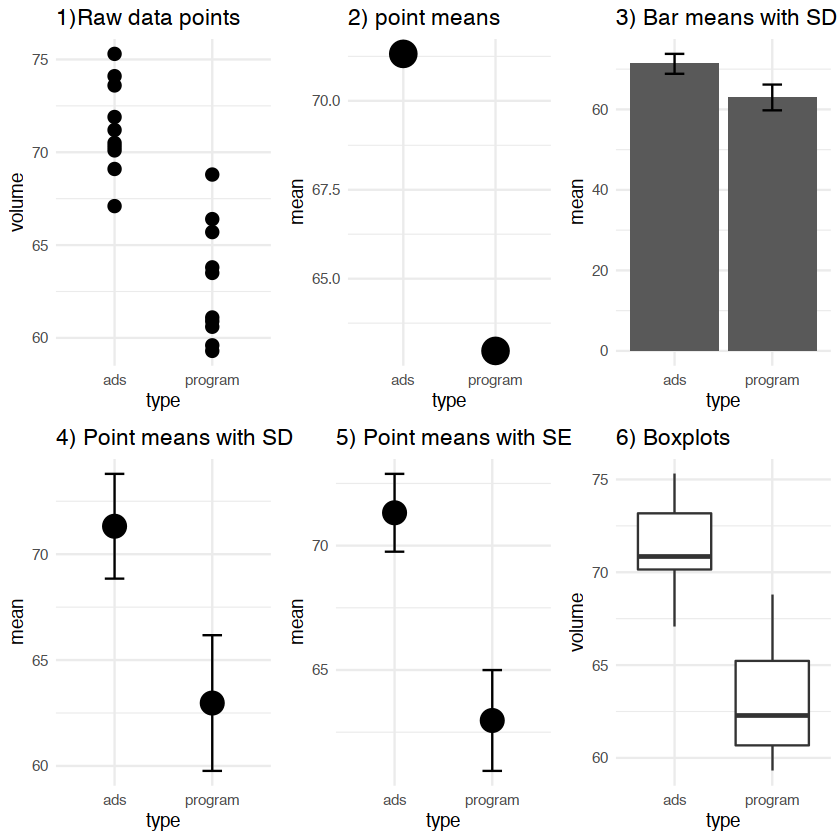

In [30]:
library(gridExtra)
grid.arrange(a,b,c,d,e,f,ncol=3)

The figure provides a first clue to suspect that a difference exists, now let's calculate the actual difference between the volume of program and advertisement for each channel:

In [31]:
data.db$difference<-data.db$ads-data.db$program
data.db

tv,program,ads,difference
<chr>,<dbl>,<dbl>,<dbl>
Rtve,68.8,71.2,2.4
Antena3,60.9,71.9,11.0
laSexta,63.5,70.3,6.8
ETB,59.6,74.1,14.5
Disney,59.3,70.5,11.2
Tele5,61.1,69.1,8.0
Cuatro,65.7,75.3,9.6
BeMad,60.6,73.6,13.0
Energy,66.4,70.1,3.7


We have to estimate the difference considering it spread, its variance. The t formula has been built to assess the measure of the difference:

$$
t=\frac{D}{S/\sqrt{n}}
$$

where,

D is the mean difference
n is the sample size (i.e., size of d).
s is the standard deviation of the differences

We can compute the p-value corresponding to the absolute value of the t-test statistics (|t|) for the degrees of freedom (df): df=n−1:

In [133]:
D<-mean(data.db$difference)
S<-sd(data.db$difference)
t<-D/(S/(sqrt(10)))
t

[1] 6.23905

But... where to place this 6.2? ok, we have a t with 6.16 is it more than expected by chance if there were no differences, this is where would we place our obs t in a distribution with no differences... is it more than expected? this is, is it more than 95% of the data sourrounding 0? Hum, now I am thinking whether the chi square follows the same logic, this is, in a chi square distribution with no differences, where would be our statistic be placed....

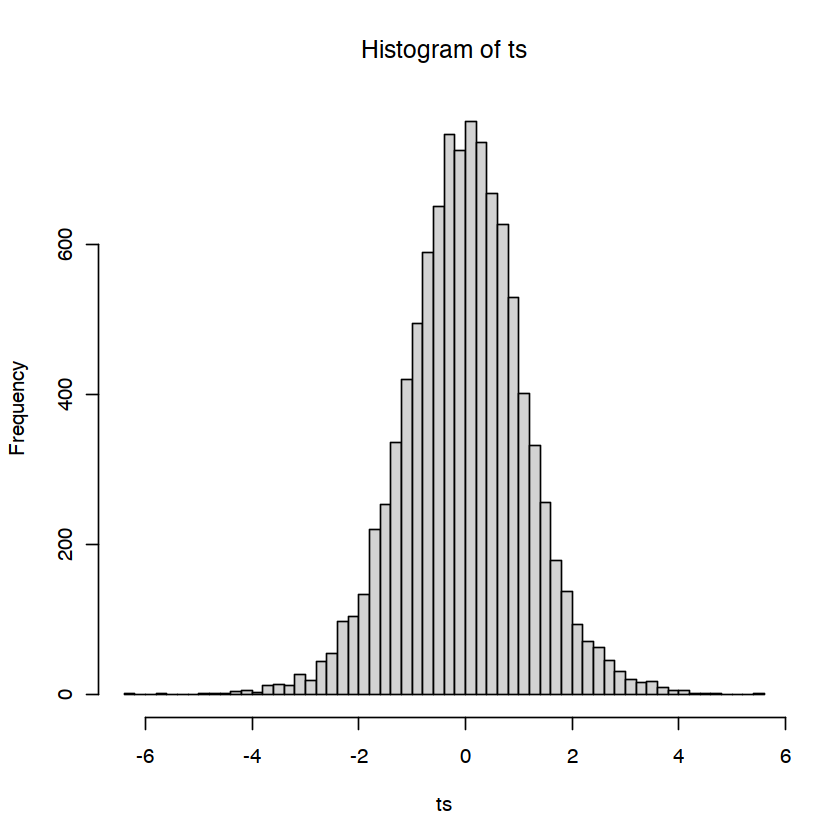

In [32]:
ts = replicate(10000,(t.test(rnorm(10)))$statistic)
hist(ts,breaks=50)#create a histogram with all possible t values 

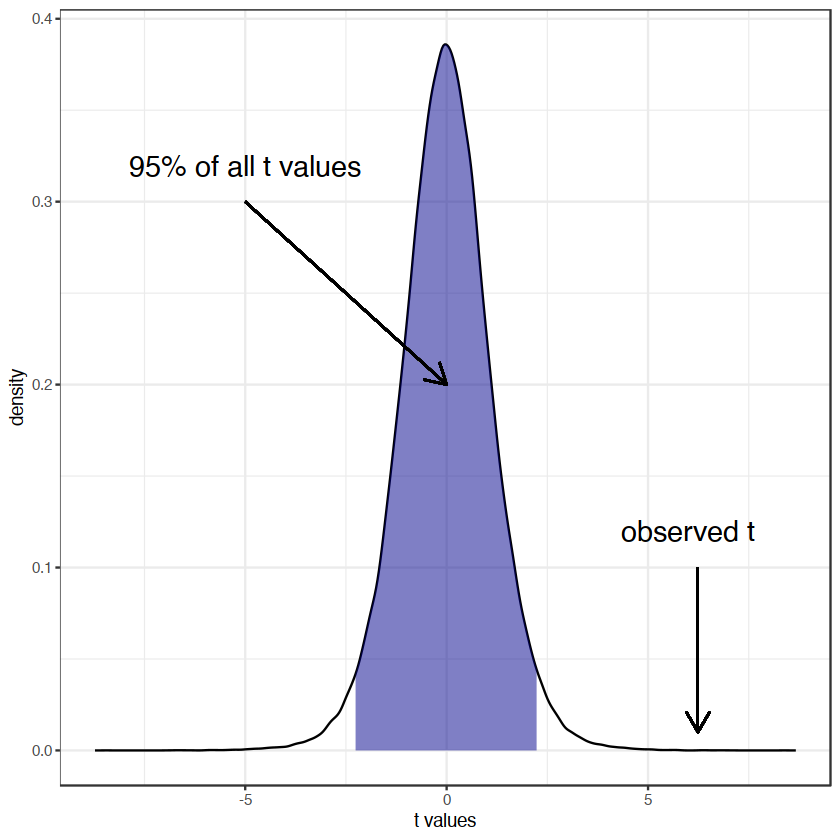

In [141]:
draws <- rt(100000,9)
dens <- density(draws)

q025 <- quantile(draws, .025)
q975 <- quantile(draws, .975)

dd <- with(dens, data.frame(x, y))
qplot(x, y, data = dd, geom="line") +
  geom_ribbon(data = subset(dd, x > q025 & x < q975),
              aes(ymax = y),
              ymin = 0, fill = "dark blue", colour = NA, alpha = 0.5)+theme_bw()+
geom_segment(aes(x = t, y = 0.1, xend = t, yend = 0.01),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate(geom="text", x=6, y=0.12, label="observed t",
              color="black",size=6)+
geom_segment(aes(x = -5, y = 0.3, xend = 0, yend = 0.2),
                  arrow = arrow(length = unit(0.5, "cm")))+
annotate(geom="text", x=-5, y=0.32, label="95% of all t values",
              color="black",size=6)+
    ylab("density") + 
    xlab("t values") 

#http://www.cookbook-r.com/Graphs/Legends_(ggplot2)/
#the arrow indicates observed t

In [33]:
t.test(volume ~ type, data = data.db.2, paired = TRUE)


	Paired t-test

data:  volume by type
t = 6.2391, df = 9, p-value = 0.0001516
alternative hypothesis: true difference in means is not equal to 0
95 percent confidence interval:
  5.322454 11.377546
sample estimates:
mean of the differences 
                   8.35 
